<a href="https://www.kaggle.com/gabrielkamkar/diamond-price-prediction?scriptVersionId=85019975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1: Upload Data

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
diamond = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
diamond.head()
# can drop first column (just index)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.isnull().sum()
# no null values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 2: Data Description (from kaggle)

price price in US dollars (326--18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [6]:
# looks like I am going to make a regression model to find the price of a diamond

# numeric data:
#   price
#   carat
#   x-length
#   y-width
#   z-depth
#   depth
#   table width


# categorical data:
#   cut
#   color
#   clarity


## 3: Quick Look at Data

In [7]:
diamond.info()

# there is no null-values in the data!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamond.describe()

#only for numeric

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
# lets look at the value counts for the categorical data attributes

diamond.cut.value_counts()/len(diamond.cut)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

In [10]:
diamond.color.value_counts()/ len(diamond.cut)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

In [11]:
diamond.clarity.value_counts()/len(diamond.cut)

SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64

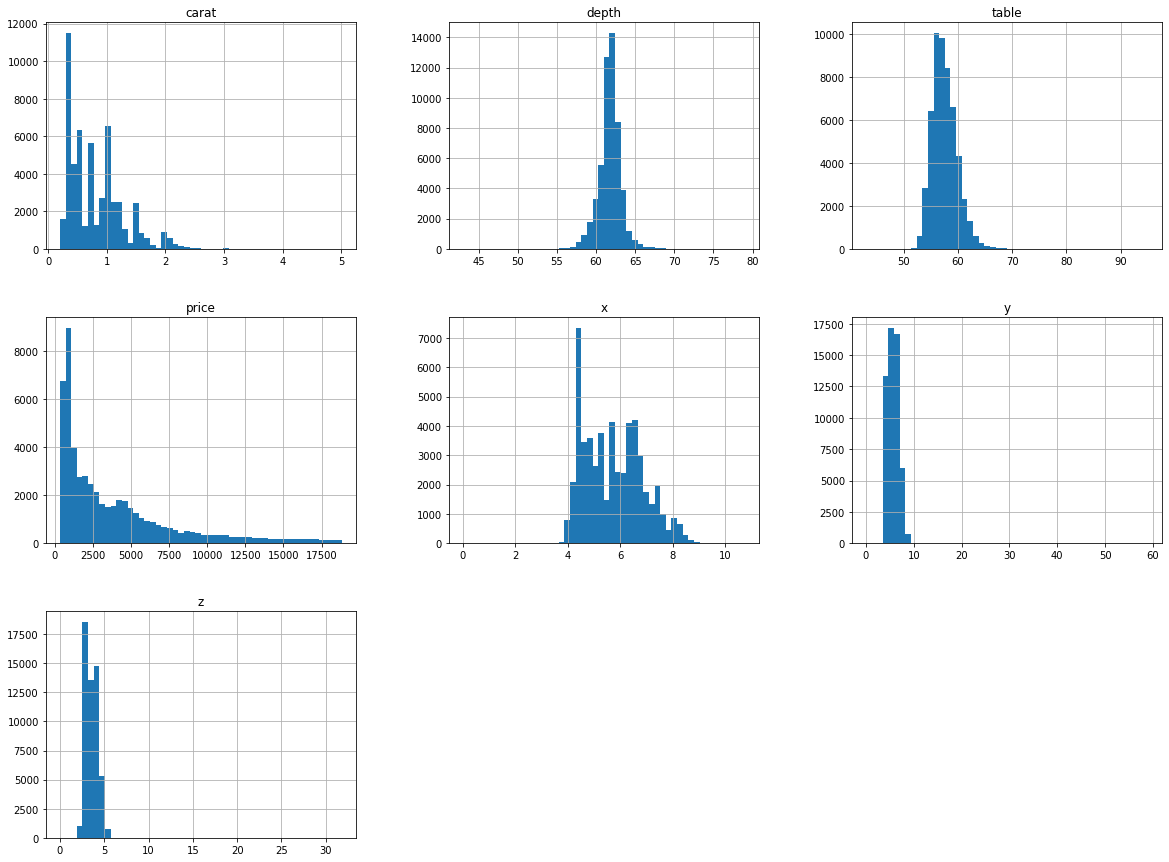

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
diamond.hist(bins = 50, figsize = (20,15))
plt.show()

In [13]:
# x and carat aren't that close to a normal distribution
# everything else ins't that bad, just needs to be scaled
# table might be a little tail heavy but just barely

# interesting that price isn't normally distributed, has a very long tail



## 4: Create Training and Test Sets

In [14]:
# don't know if I should use train_test_split or do stratefied
# have to see if dataset is large enough
len(diamond)

# I think this is large enought

53940

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(diamond, test_size = 0.2, random_state = 42)

In [16]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5: Further Data Exploration / Visualization

In [18]:
diamond_corr = diamond.corr()
diamond_corr['price'].sort_values(ascending=False)

# can see that table and depth are pretty weakly correlated
# want to check for categorical data


price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

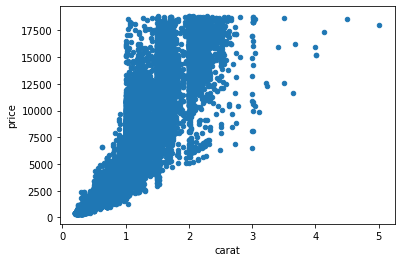

In [19]:
diamond.plot(kind = 'scatter', x = 'carat', y='price')

In [20]:
# need to transform categorical data first in order to explore it

In [21]:
# lets see if any data combinations will give us anything valueable

diamond['table_depth'] = diamond.table/diamond.depth
diamond['volume'] = diamond.x * diamond.y * diamond.z
diamond['density'] = diamond.carat / diamond.volume


In [22]:
diamond_corr_new = diamond.corr()
diamond_corr_new['price'].sort_values(ascending = False)

# volume seems to have a high correlation!


price          1.000000
carat          0.921591
volume         0.902385
x              0.884435
y              0.865421
z              0.861249
density        0.143440
table          0.127134
table_depth    0.101406
depth         -0.010647
Name: price, dtype: float64

## 6: Data Cleaning / Processing

In [23]:
# start of with copying a clean training set

diamond = train.drop('price', axis = 1)
diamond_labels = train['price'].copy()

In [24]:
diamond.head()
diamond_labels.head()


26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
Name: price, dtype: int64

## 7: Categorical Attributes

In [25]:
# the categorical data I have is very clearnly ordinal
# cut, color, and clarity, all go from worst to best 

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
diamond_cat = diamond[['cut', 'color', 'clarity']]
diamond_cat.head(10)

,cut,color,clarity
26546,Good,F,SI2
9159,Very Good,E,SI2
14131,Premium,H,VS2
15757,Good,E,SI2
24632,Very Good,G,VS1
49828,Premium,G,VVS1
38682,Ideal,F,VVS1
44604,Ideal,G,VS2
11459,Ideal,G,VS2
2495,Ideal,E,VVS1


In [28]:
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                               ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(diamond_cat)


In [29]:
diamond_cat_encoded[:10]

# I encoded the ordinal categorical data!!

array([[1., 4., 1.],
       [2., 5., 1.],
       [3., 2., 3.],
       [1., 5., 1.],
       [2., 3., 4.],
       [3., 3., 6.],
       [4., 4., 6.],
       [4., 3., 3.],
       [4., 3., 3.],
       [4., 5., 6.]])

In [30]:
# I want to look at the encoded data visually and correlations

diamond_cat_df = pd.DataFrame(data=diamond_cat_encoded, columns = ['cut', 'color', 'clarity'])
diamond_cat_df.head()

,cut,color,clarity
0,1.0,4.0,1.0
1,2.0,5.0,1.0
2,3.0,2.0,3.0
3,1.0,5.0,1.0
4,2.0,3.0,4.0


In [31]:
diamond_labels_df = pd.DataFrame(data=diamond_labels, columns = ['price'])
diamond_labels_df = diamond_labels_df.reset_index()
diamond_labels_df.drop('index', axis=1, inplace=True)
diamond_labels_df.head()

,price
0,16231
1,4540
2,5729
3,6300
4,12968


In [32]:
diamond_cat_explore = diamond_cat_df.merge(diamond_labels_df, how = 'left', left_index = True, right_index = True)
diamond_cat_explore.head()

,cut,color,clarity,price
0,1.0,4.0,1.0,16231
1,2.0,5.0,1.0,4540
2,3.0,2.0,3.0,5729
3,1.0,5.0,1.0,6300
4,2.0,3.0,4.0,12968


In [33]:
diamond_cat_explore.corr()['price']
# interesting


cut       -0.055173
color     -0.171210
clarity   -0.146367
price      1.000000
Name: price, dtype: float64

## 8: Transformations

In [34]:
# make a tranformer that ads the volume attribute

from sklearn.base import BaseEstimator, TransformerMixin

class VolumeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, hyper = None):
        self.hyper = hyper
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        volume = X['x'] * X['y'] * X['z']
        return np.c_[X, volume]
    

In [35]:
add_vol = VolumeAdder()
diamond_vol = add_vol.transform(diamond)
diamond_vol

array([[2.01, 'Good', 'F', ..., 8.19, 4.77, 321.515649],
       [1.01, 'Very Good', 'E', ..., 6.49, 3.92, 167.14605600000002],
       [1.1, 'Premium', 'H', ..., 6.54, 4.1, 176.70425999999998],
       ...,
       [0.33, 'Very Good', 'F', ..., 4.46, 2.7, 54.068580000000004],
       [0.9, 'Premium', 'J', ..., 6.03, 3.82, 141.202098],
       [1.14, 'Premium', 'F', ..., 6.79, 4.11, 190.325058]], dtype=object)

## 9: Scaling / Transformation Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [37]:
diamond = train.drop('price', axis = 1)


In [38]:
diamond_num = diamond.drop(['cut', 'color', 'clarity'], axis =1 , inplace = False)
diamond_cat = diamond.drop(list(diamond_num), axis = 1, inplace = False)

In [39]:
# start of by making pipeline for numerican data

num_pipeline = Pipeline([
    ('vol_adder', VolumeAdder()),
    ('scaler', StandardScaler())
])

In [40]:
num_labels = list(diamond_num)
num_labels.append('volume')
num_labels

['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [41]:
diamond_num_prep = num_pipeline.fit_transform(diamond_num)
diamond_num_prep_df = pd.DataFrame(diamond_num_prep, columns = num_labels)
diamond_num_prep_df

,carat,depth,table,x,y,z,volume
0,2.560056,-2.550748,2.933861,2.229450,2.138209,1.738207,2.439003
1,0.447392,-1.220426,1.139575,0.747550,0.656710,0.537733,0.474064
2,0.637532,0.529996,0.242432,0.765404,0.700284,0.791951,0.595729
3,1.482597,-0.170173,3.382432,1.318885,1.249310,1.243894,1.254962
4,1.524851,0.249928,-0.206140,1.372448,1.380030,1.399249,1.415030
...,...,...,...,...,...,...,...
43147,0.531899,0.459979,0.691003,0.667206,0.674140,0.721335,0.521191
43148,-0.693447,-0.520257,-1.103283,-0.627225,-0.633065,-0.676864,-0.671949
43149,-0.989219,-1.010376,0.242432,-1.109289,-1.112374,-1.185299,-0.965276
43150,0.214999,0.740047,0.691003,0.354757,0.255834,0.396501,0.143829


In [42]:
# full pipeline

num_attribs = list(diamond_num)
cat_attribs = list(diamond_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', ordinal_encoder, cat_attribs)
])

In [43]:
full_labels = num_labels + ['cut', 'color', 'clarity']

In [44]:
diamond_prep = full_pipeline.fit_transform(diamond)
diamond_prep

array([[ 2.56005606, -2.55074762,  2.93386055, ...,  1.        ,
         4.        ,  1.        ],
       [ 0.44739205, -1.22042647,  1.13957453, ...,  2.        ,
         5.        ,  1.        ],
       [ 0.63753181,  0.52999608,  0.24243153, ...,  3.        ,
         2.        ,  3.        ],
       ...,
       [-0.98921948, -1.01037577,  0.24243153, ...,  2.        ,
         4.        ,  7.        ],
       [ 0.21499901,  0.74004679,  0.69100303, ...,  3.        ,
         0.        ,  2.        ],
       [ 0.72203837, -0.94035886,  0.24243153, ...,  3.        ,
         4.        ,  2.        ]])

In [45]:

diamond_prep_df = pd.DataFrame(diamond_prep, columns = full_labels )

In [46]:
diamond_prep_df

,carat,depth,table,x,y,z,volume,cut,color,clarity
0,2.560056,-2.550748,2.933861,2.229450,2.138209,1.738207,2.439003,1.0,4.0,1.0
1,0.447392,-1.220426,1.139575,0.747550,0.656710,0.537733,0.474064,2.0,5.0,1.0
2,0.637532,0.529996,0.242432,0.765404,0.700284,0.791951,0.595729,3.0,2.0,3.0
3,1.482597,-0.170173,3.382432,1.318885,1.249310,1.243894,1.254962,1.0,5.0,1.0
4,1.524851,0.249928,-0.206140,1.372448,1.380030,1.399249,1.415030,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
43147,0.531899,0.459979,0.691003,0.667206,0.674140,0.721335,0.521191,2.0,1.0,3.0
43148,-0.693447,-0.520257,-1.103283,-0.627225,-0.633065,-0.676864,-0.671949,4.0,6.0,4.0
43149,-0.989219,-1.010376,0.242432,-1.109289,-1.112374,-1.185299,-0.965276,2.0,4.0,7.0
43150,0.214999,0.740047,0.691003,0.354757,0.255834,0.396501,0.143829,3.0,0.0,2.0


## 10: Model Selection / Training

In [47]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [48]:
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [49]:
# time to try out a bunch of different models and see what we get

In [50]:
# linear regression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(diamond_prep, diamond_labels)
lin_pred = lin_reg.predict(diamond_prep)
lin_rmse = np.sqrt(mean_squared_error(lin_pred, diamond_labels))
lin_rmse

1213.1289310826962

In [52]:
# cross validation score

In [53]:
lin_scores = cross_val_score(lin_reg, diamond_prep, diamond_labels, scoring = 'neg_mean_squared_error', cv=5)
lin_rmse = np.sqrt(-lin_scores)
lin_rmse.mean()

1262.7675063343245

In [54]:
# lets make a function that lets you put in the algorim and spits out cv_scores, mean, std

In [55]:
def get_scores(algorithm, data_prep, data_labels, n):
    scores = cross_val_score(algorithm, data_prep, data_labels,
                             scoring = 'neg_mean_squared_error',cv = n )
    rmse_scores = np.sqrt(-scores)
    print('Scores:', rmse_scores)
    print('Mean:', rmse_scores.mean())
    print('Std:', rmse_scores.std())

In [56]:
get_scores(lin_reg, diamond_prep, diamond_labels, 5)

Scores: [1178.10195747 1237.58497281 1501.91508915 1190.72504205 1205.51047019]
Mean: 1262.7675063343245
Std: 121.21259536451781


In [57]:
# logistic regression takes toooooo long!

In [58]:
#  Decistion Tree

In [59]:
tree_reg = DecisionTreeRegressor().fit(diamond_prep, diamond_labels)
get_scores(tree_reg, diamond_prep, diamond_labels, 5)

Scores: [723.67814454 775.25518367 763.08179561 755.26969328 747.02829761]
Mean: 752.86262294462
Std: 17.305637147441395


In [60]:
# Random Forest

In [61]:
forest_reg = RandomForestRegressor(random_state=42).fit(diamond_prep, diamond_labels)
get_scores(forest_reg, diamond_prep, diamond_labels, 5)

Scores: [526.32969954 584.63881898 555.69816229 548.78313769 551.32805795]
Mean: 553.3555752895184
Std: 18.65231900922464


In [62]:
# check training set vs validation sets for random forest (over or underfitting)

In [63]:
forest_rmse = np.sqrt(mean_squared_error(forest_reg.predict(diamond_prep),diamond_labels))
forest_rmse

203.60864281376942

In [64]:
# check rmse of decision tree
tree_rmse = np.sqrt(mean_squared_error(tree_reg.predict(diamond_prep),diamond_labels))
tree_rmse


9.067323921015339

In [65]:
# Support Vector Machine

svr_reg = SVR().fit(diamond_prep, diamond_labels)


In [66]:
svr_rmse = np.sqrt(mean_squared_error(svr_reg.predict(diamond_prep),diamond_labels))
svr_rmse

2508.97775521761

## 11: Model Tuning

In [67]:
# randomized search
# look at current hyperparameters

forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
random_grid = {
    'n_estimators': stats.randint(low=1, high = 200),
    'max_features': stats.randint(low=1, high = 8),
    'bootstrap': [True, False]
}

In [69]:
forest_rand_search = RandomizedSearchCV(forest_reg, random_grid, n_iter = 5, cv=5, 
                                        scoring = 'neg_mean_squared_error', random_state = 42)
forest_rand_search.fit(diamond_prep, diamond_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f018c0f7f90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f018c093750>},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
forest_rand_search.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 100}

In [71]:
cv_res = forest_rand_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

556.2178349741188 {'bootstrap': True, 'max_features': 4, 'n_estimators': 93}
575.3082270796126 {'bootstrap': True, 'max_features': 3, 'n_estimators': 72}
553.229702760368 {'bootstrap': True, 'max_features': 5, 'n_estimators': 103}
571.7659399439528 {'bootstrap': False, 'max_features': 3, 'n_estimators': 75}
553.1492962746979 {'bootstrap': True, 'max_features': 5, 'n_estimators': 100}


In [72]:
# now time to get feature importances

feature_importances = forest_rand_search.best_estimator_.feature_importances_
feature_importances

array([0.25320071, 0.00376057, 0.00226086, 0.05192969, 0.20977062,
       0.02732883, 0.35708096, 0.00233912, 0.03206563, 0.06026302])

In [73]:
extra_attribs = ['volume','cut', 'color', 'clarity']
attribs = num_attribs + extra_attribs
sorted(zip(feature_importances,attribs), reverse=True)

[(0.357080960781296, 'volume'),
 (0.25320071351719214, 'carat'),
 (0.20977061575739467, 'y'),
 (0.06026301578588639, 'clarity'),
 (0.051929685145918655, 'x'),
 (0.03206563057686161, 'color'),
 (0.027328827024434583, 'z'),
 (0.003760572829288908, 'depth'),
 (0.002339119404873121, 'cut'),
 (0.002260859176853925, 'table')]

In [74]:
# dropping the variables that are less than a tenth

diamond_prep_new = diamond_prep_df.drop(['depth','cut','table'], axis = 1, inplace = False)
diamond_prep_new

forest_reg_new = RandomForestRegressor(bootstrap = True, max_features = 5, n_estimators = 100, random_state = 42)
forest_reg_new.fit(diamond_prep_new, diamond_labels)

RandomForestRegressor(max_features=5, random_state=42)

In [75]:
forest_new_rmse = np.sqrt(mean_squared_error(forest_reg_new.predict(diamond_prep_new),diamond_labels))
forest_new_rmse

209.96789919846867

In [76]:
get_scores(forest_reg_new, diamond_prep_new, diamond_labels, 5)

Scores: [540.79118488 597.25192364 571.38662714 564.10357105 556.54774086]
Mean: 566.0162095147557
Std: 18.623228370138033


## 12: Prediction Time

In [77]:
final_model = forest_rand_search.best_estimator_

X_test = test.drop('price', axis = 1)
Y_test = test['price'].copy()

X_test_prep = full_pipeline.transform(X_test)


In [78]:
final_predictions = final_model.predict(X_test_prep)
final_rmse = np.sqrt(mean_squared_error(final_predictions,Y_test))
final_rmse

534.4815709288541

In [79]:
# see confidence interval

squared_errors = (final_predictions - Y_test)**2
np.sqrt(stats.t.interval(0.95, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))


array([510.3062553 , 557.60974267])

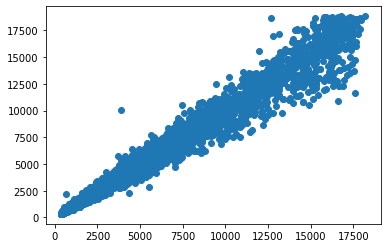

In [80]:
plt.scatter(final_predictions, Y_test)

# here we can see the graph of the actual vs predicted